# 问题一：概率思考题

## 错误版本

In [1]:
import random 

times = 1000  # 实验次数，先设少一点，跑跑看结果
options = ['A','B','C','D'] # 一共4个选项
result1 = {'win':0,'failure':0} # 定义一个记录输赢结果的字典

fir_answer = random.choice(options) # 严重逻辑错误！这里模拟的是“我们第一次的选择”！
                                     # 它应该叫 my_first_choice 更合适。
tmp_option = options.copy() # 复制一份选项列表
tmp_option.remove(fir_answer) # 从剩下的3个选项中，主持人要打开一个错误的
wrong = random.choice(tmp_option) #  严重错误！主持人知道答案，不能瞎选！
                                  # 这里的问题是，我让程序从剩下的三个选项中随机选一个打开，
                                  # 完全没有考虑“主持人不能打开正确答案”这个关键约束。
options.remove(wrong) # 主持人打开了一个错误答案，把它从选项中移除
aware_options = options.copy() # 剩下的选项，供我们选择
aware_options.remove(fir_answer) # 再把我们第一次选的也去掉，剩下的才是我们“换”的时候可以选的

for i in range(times):
    answer = random.choice(options) #  再次错误！正确答案在循环开始前就该确定了！
                                    # 而且，这里从剩下的 3 个选项中（原 4 个选项 - 1 个主持人排除的错误项）
                                    # 随机选一个作为答案，又一次破坏了最初 1/4 的概率分布！
    end_answer = random.choice(aware_options) # 模拟我们最终“换”了之后的新选择
    if end_answer == answer:
        result1['win']+=1
    else:
        result1['failure']+=1
print("Times of win =%d,times of failure =%d,The pro of win =%.4f,The pro of failure =%04f"%(result1['win'],result1['failure'],result1['win']/times,result1['failure']/times))
# 看到胜率不是 0.375，就知道肯定哪里不对劲了！

Times of win =340,times of failure =660,The pro of win =0.3400,The pro of failure =0.660000


## 正确版本

In [2]:
import random 

times = 10000000 # 增加实验次数到一千万，让结果更稳定、更接近理论值
options = ['A','B','C','D'] # 选项列表
result1 = {'win':0,'failure':0} # 记录最终“换答案”策略的输赢结果

for i in range(times):
    answer = random.choice(options) # 1. 每次实验，先确定“正确答案”是什么 (1/4 概率)
    fir_answer = random.choice(options) # 2. 模拟“我第一次的选择” (也是 1/4 概率)
    tmp_option = options.copy() # 复制一个选项列表，用于主持人操作
    tmp_option.remove(fir_answer) # 3. 从这 3 个剩下的选项中，主持人要打开一个错误的
    
    # 这一块是整个逻辑最最关键的部分！！！
    if fir_answer!=answer: # 4a. 如果我第一次选错了（概率 3/4）
        tmp_option.remove(answer) # 那么剩下的 3 个选项里，有一个是正确答案。
                                  # 主持人不能选正确答案，所以要先把它排除掉。
                                  # 此时 tmp_option 里只剩下 2 个“错误选项”，主持人必须从这 2 个里选一个。
    # 4b. 如果我第一次选对了（概率 1/4）
    # 那么剩下的 3 个选项都是错误的。主持人可以从这 3 个里随便选一个打开，所以不用额外操作。
    
    wrong = random.choice(tmp_option) # 5. 主持人从被允许的选项中，随机选择并打开一个错误项
    
    aware_options = options.copy() # 6. 准备进行“换”的动作
    aware_options.remove(wrong) # 排除主持人打开的那个选项
    aware_options.remove(fir_answer) # 排除我第一次选的那个选项
    # 此时 aware_options 列表里，只剩下 1 个选项了，这就是我“换”之后的新选择！
    
    end_answer = random.choice(aware_options) # 7. 模拟我做出“最终的选择”（因为只剩一个，所以就是它）
    
    if end_answer == answer:
        result1['win']+=1
    else:
        result1['failure']+=1
        
print("Times of win =%d,times of failure =%d,The pro of win =%.4f,The pro of failure =%04f"%(result1['win'],result1['failure'],result1['win']/times,result1['failure']/times))
# 胜率 0.375 左右！成功印证了 3/8 的理论计算！

Times of win =3754593,times of failure =6245407,The pro of win =0.3755,The pro of failure =0.624541


# 问题二：正态分布检验

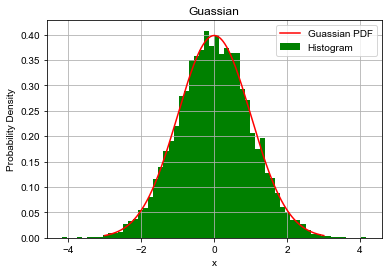

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import rcParams # 这是为了让 Matplotlib 能显示中文，非核心逻辑

rcParams['font.family'] = 'Arial Unicode MS' # 设置字体为支持中文的字体

guassian_data = np.random.randn(10000) # 核心：生成 10000 个服从“标准正态分布”的随机数
                                       # 标准正态分布就是均值 Mean=0，标准差 Var=1 的正态分布。

Mean = guassian_data.mean() # 计算这批随机数的实际平均值
Var = math.sqrt(guassian_data.var()) # 计算这批随机数的实际标准差（开根号是标准差）

# 1. 绘制直方图，也就是“数据轮廓”
plt.hist(guassian_data, 
         bins=60, # 分成 60 个“柱子”
         density=True, # 关键！把纵坐标变成“频率密度”，这样才能和 PDF 曲线（概率密度）进行对比
         color ='g', # 绿色
         label='Histogram') # 图例名称

# 2. 绘制理论上的正态分布 PDF 曲线
# np.linspace 用于生成一组等间隔的 x 坐标，用于画曲线
x=np.linspace((Mean-3*Var),(Mean+3*Var),1000) # x 的范围取在平均值左右 3 倍标准差，基本覆盖了所有数据
# 正态分布的概率密度函数（PDF）公式！
pdf=(1/np.sqrt(2*np.pi*(Var**2))*np.exp(-(x-Mean)**2/(2*Var**2)))
plt.plot(x,pdf,color = 'r',label = 'Guassian PDF') # 画出红色曲线

# 3. 设置图表细节
plt.title('Guassian')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True) # 显示网格线，更清晰
plt.show() # 显示图表

# 问题三：

Running experiments: 100%|█████████████████████████████████████████████████████████| 9999/9999 [02:58<00:00, 56.01it/s]


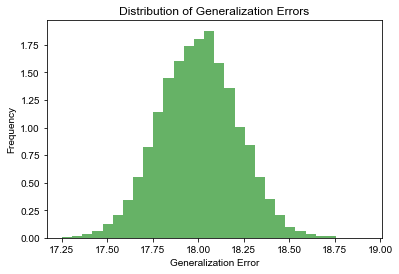

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test: Stat = 0.9998, p-value = 0.4697
The generalization errors follow a normal distribution.


In [4]:
import numpy as np
from tqdm import tqdm # 进度条工具，让漫长的循环等待不那么无聊
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 引入我们要用的“简单的”线性模型
from sklearn.metrics import mean_squared_error # 引入误差计算函数 MSE
from scipy.stats import shapiro # 引入专业的“Shapiro-Wilk 正态性检验”工具

# 1. 生成带噪声的训练数据 (y = 3x^2 + 噪声)
def generate_data(n_samples=100):
    X = np.random.normal(0, 1, (n_samples, 1)) # X 随机取值，符合标准正态分布
    # y 是非线性（二次方）关系 + 随机噪声（也是标准正态分布）
    y = 3 * X * X + np.random.normal(0, 1, (n_samples, 1)) 
    return X, y

# 2. 生成理想的测试数据 (y = 3x^2，无噪声)
def generate_data_test(n_samples=100):
    X = np.random.normal(0, 1, (n_samples, 1))
    y = 3 * X * X # 注意：这里没有加 np.random.normal(0, 1, ...)！
                  # 我们的测试集是“理想”的、不带随机噪声的纯净曲线，这样测出来的误差能更好地反映模型本身的“系统性误差”。
    return X,y

# 3. 计算误差的函数
def calculate_errors(X_train, X_test, y_train, y_test):
    model = LinearRegression() # 实例化（创建一个）线性模型对象
    model.fit(X_train, y_train) # 用带噪声的训练集去训练这个“直”的线性模型（明知故犯）
    
    y_train_pred = model.predict(X_train) # 在训练集上预测
    y_test_pred = model.predict(X_test) # 在纯净的测试集上预测
    
    train_error = mean_squared_error(y_train, y_train_pred) # 计算训练误差
    generalization_error = mean_squared_error(y_test, y_test_pred) # 计算泛化误差（核心关注点）
    
    return train_error, generalization_error

# --- 主实验部分 ---
n_samples = 100000 # 每次实验使用的数据量（越大越稳定） 
n_experiments = 9999 # 重复进行 9999 次实验（要观察误差的分布，重复次数必须足够多）
generalization_errors = [] # 创建一个空列表，用来收集每次实验得到的“泛化误差值”

# 进行大量重复实验
for _ in tqdm(range(n_experiments), desc="Running experiments"):
    X, y = generate_data(n_samples) # 每次循环都生成一套新的、带随机噪声的训练集
    X_test , y_test = generate_data_test(n_samples) # 每次循环也生成一套新的、无噪声的测试集
    # 调用函数，得到这一轮的泛化误差
    train_error, generalization_error = calculate_errors(X, X_test, y, y_test)
    generalization_errors.append(generalization_error) # 把误差值记录下来

# 1. 绘制泛化误差的分布直方图
plt.hist(generalization_errors, 
         bins=30, # 分成 30 个柱子
         density=True, # 再次使用密度归一化
         alpha=0.6, 
         color='g')
plt.title('Distribution of Generalization Errors')
plt.xlabel('Generalization Error')
plt.ylabel('Frequency')
plt.show() # 看一看，它是不是长得像个钟形（正态分布）？

# 2. 进行 Shapiro-Wilk 正态性检验（用统计学方法严格验证）
stat, p_value = shapiro(generalization_errors)
print(f"Shapiro-Wilk Test: Stat = {stat:.4f}, p-value = {p_value:.4f}")

# 统计学判断标准：如果 p-value > 0.05，则不能拒绝“数据来自正态分布”的假设。
if p_value > 0.05:
    print("The generalization errors follow a normal distribution.")
else:
    print("The generalization errors do not follow a normal distribution.")
# 看到 p-value > 0.05，我的结论是：果然是正态分布！中心极限定理太神奇了！